In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
weather_data = np.load('./weather.npz')['data']
traffic_data = np.load('./PEMS04.npz')['data']

weather_data = weather_data[:,:,1:]

In [3]:
# In order to work with scikit learn, each timestamp has to be listed as a 1d array (307*17, 307*3)
def unpack_data(data):
    return np.reshape(data, [data.shape[0], data.shape[1] * data.shape[2]])

def pack_data(data):
    return np.reshape(data, [data.shape[0], 307, -1])

In [4]:
def rmsle(y_actual, y_pred):
    log1 = np.nan_to_num(np.array([np.log1p(v) for v in y_pred]))
    log2 = np.nan_to_num(np.array([np.log1p(v) for v in y_actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [5]:
X = unpack_data(weather_data)
y = unpack_data(traffic_data)
train_X, test_X, train_y, test_y = train_test_split(X, y)
display(train_X.shape)
display(test_X.shape)
display(train_y.shape)
display(test_y.shape)

(12744, 4912)

(4248, 4912)

(12744, 921)

(4248, 921)

# Linear Regression

In [ ]:
lr_model = LinearRegression(copy_X = True)
lr_model.fit(train_X, train_y)
lr_model.score(test_X, test_y)

## Individal Features

In [7]:
X = weather_data.mean(axis = 1)
for i in range(3):
    y = traffic_data[:,:,i]
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    lr_model = LinearRegression(copy_X = True)
    lr_model.fit(train_X, train_y)
    display(lr_model.score(test_X, test_y))

0.21299383491351953

0.15565336355740556

0.11222813031877632

# Linear Regression w/ Means

## All features at once

In [8]:
X = weather_data.mean(axis = 1)
y = traffic_data.mean(axis = 1)
train_X, test_X, train_y, test_y = train_test_split(X, y)
display(train_X.shape)
display(test_X.shape)
display(train_y.shape)
display(test_y.shape)

(12744, 16)

(4248, 16)

(12744, 3)

(4248, 3)

0.2410060652437126

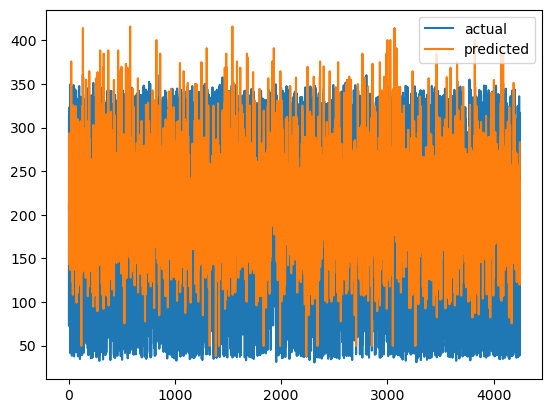

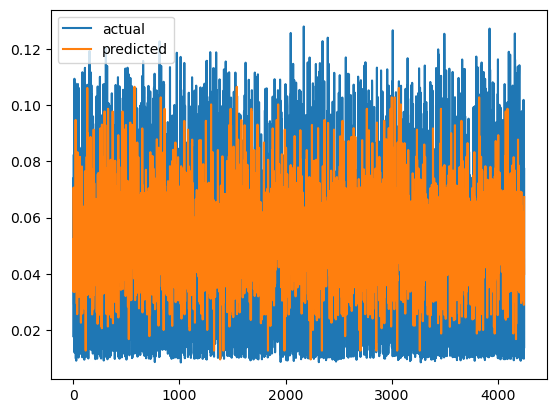

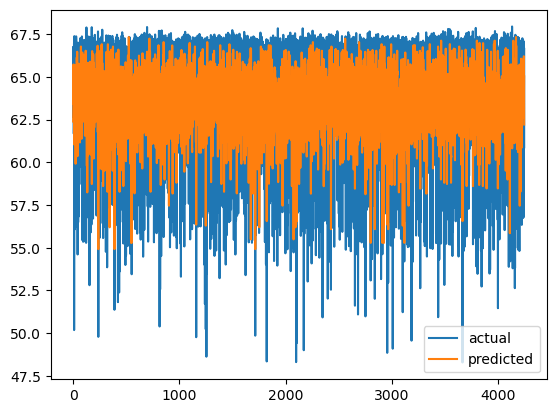

In [9]:
lr_model = LinearRegression(copy_X = True)
lr_model.fit(train_X, train_y)
pred_y = lr_model.predict(test_X)
display(lr_model.score(test_X, test_y))
for i in range(3):
    plt.plot(test_y[:,i], label = 'actual')
    plt.plot(pred_y[:,i], label = 'predicted')
    plt.legend()
    plt.show()

## Individually per feature

0.25225887129885005

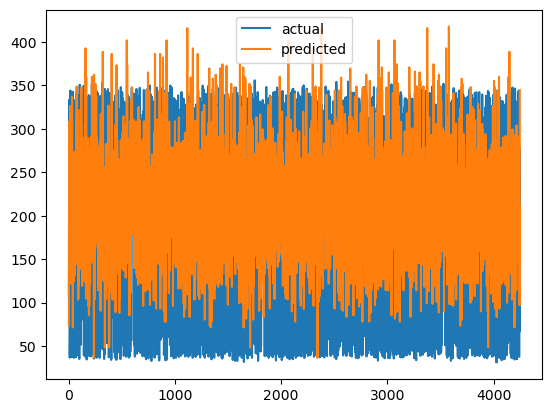

0.22021504790106783

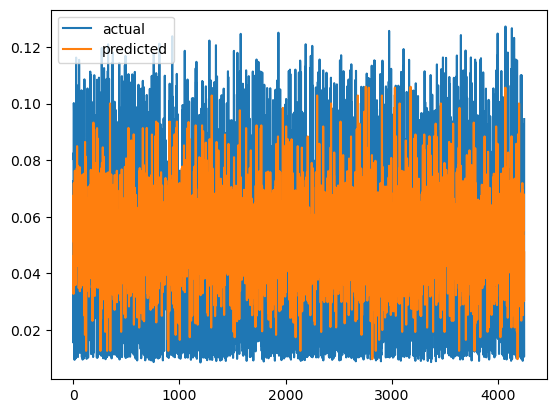

0.17366356592824073

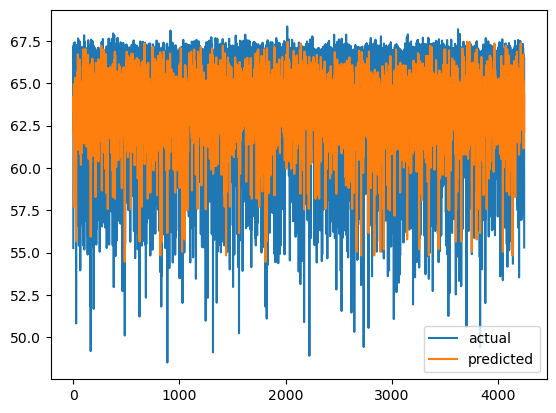

In [10]:
X = weather_data.mean(axis = 1)
y = traffic_data.mean(axis = 1)
y1, y2, y3 = y[:,0], y[:,1], y[:,2]

for y in [y1, y2, y3]:
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    lr_model = LinearRegression(copy_X = True)
    lr_model.fit(train_X, train_y)
    pred_y = lr_model.predict(test_X)
    display(lr_model.score(test_X, test_y))
    plt.plot(test_y, label = 'actual')
    plt.plot(pred_y, label = 'predicted')
    plt.legend()
    plt.show()

# SVM w/ Individual Features

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parameters = [{'kernel': ['poly'], 'degree': [10], 'coef0': [1], 'C': [0.1, 1, 10]}]
#parameters = [{'kernel': ['poly'], 'degree': [2, 3, 10], 'coef0': [1], 'C': [0.1, 1, 10, 100]}]

X = weather_data.mean(axis = 1)
# for i in range(3):
#     y = traffic_data.mean(axis = 1)[:,i]
#     train_X, test_X, train_y, test_y = train_test_split(X, y)
#     display(train_X.shape)
#     display(test_X.shape)
#     display(train_y.shape)
#     display(test_y.shape)
#     clf = GridSearchCV(SVR(), parameters, scoring = 'explained_variance')
#     clf.fit(train_X, train_y)
    
#     print(f'Best parameters: {clf.best_params_}')
#     pred_y = clf.predict(test_X)
#     display(clf.score(test_X, test_y))
#     plt.plot(test_y, label = 'actual')
#     plt.plot(pred_y, label = 'predicted')
#     plt.legend()
#     plt.show()

# Pytorch

In [59]:
import torch
import torch.nn as nn
from torch.nn.functional import normalize
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader
from torchmetrics import MeanAbsolutePercentageError

torch.set_default_dtype(torch.float64)

traffic_data_variables = [torch.from_numpy(traffic_data[:,:,i]) for i in range(traffic_data.shape[2])]

X = torch.from_numpy(weather_data[:,0])
means = X.mean(dim=0, keepdim=True)
stds = X.std(dim=0, keepdim=True)
X = (X - means) / stds
y1, y2, y3 = ((y - y.mean()) / y.std() for y in traffic_data_variables)



print(X.shape)
for y in [y1, y2, y3]:
    print(y.shape)
    print(y.dtype)
    
for y in [y1, y2, y3]:
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    

torch.Size([16992, 16])
torch.Size([16992, 307])
torch.float64
torch.Size([16992, 307])
torch.float64
torch.Size([16992, 307])
torch.float64


In [60]:
class Weather_Model_Basic(nn.Module):
    def __init__(self, input_features, output_features):
        super(Weather_Model_Basic, self).__init__()
        self.layer = nn.Linear(input_features, output_features)
        
    def forward(self, x):
        x = self.layer(x)
        return x

In [75]:
for y in [y1, y2, y3]:
    # Prepare data and necessary functions
    train_X, test_X, train_y, test_y = train_test_split(X, y)
    
    model = Weather_Model_Basic(16, 307)
    
    training_dataset = TensorDataset(train_X, train_y)
    testing_dataset = TensorDataset(test_X, test_y)
    print('Training set has {} instances'.format(len(training_dataset)))
    print('Testing set has {} instances'.format(len(testing_dataset)))
    
    train_loader = DataLoader(training_dataset, shuffle = True)
    test_loader = DataLoader(testing_dataset, shuffle = True)
    
    loss_function = nn.L1Loss()
    optimizer = SGD(model.parameters(), lr = 0.1)
    
    model.train(True)
    
    # Training
    total_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        # Forward
        outputs = model(inputs)
        
        loss = loss_function(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss
    
    avg_loss = total_loss / (i + 1)
        
    model.train(False)
    
    # Testing
    total_tloss = 0.0
    for i, data in enumerate(test_loader):
        inputs, labels = data
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        total_tloss += loss
        
    avg_tloss = total_tloss / (i + 1)
    
    print(f'LOSS train {avg_loss} valid {avg_tloss}')
        

Training set has 12744 instances
Testing set has 4248 instances
LOSS train 0.6120110519923341 valid 0.5446539723050461
Training set has 12744 instances
Testing set has 4248 instances
LOSS train 0.5493804732406848 valid 0.5089423829346992
Training set has 12744 instances
Testing set has 4248 instances
LOSS train 0.47363600098146164 valid 0.4444495582412166


tensor(2000001.0000)